In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
from sklearn.datasets import make_moons, make_blobs
from numpy import pi
rcParams['figure.figsize'] = 10, 6

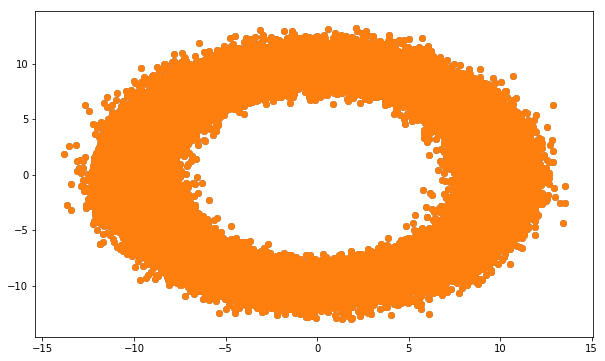

In [163]:
#data (gaussian)
"""
n=2500; d=2;
data_g=np.random.randn(n,d)
data_g1=np.random.randn(n,d)
data_g+=5
data_g1-=5
print(data_g.shape)
print(data_g1.shape)
data=np.concatenate((data_g,data_g1),axis=0)
"""
"""
#data Moon 
n_samples = 5000
data=4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25]))
"""
"""
#data spiral
N = 500 # number of datapoints
theta = (np.random.rand(N))*3*pi # np.linspace(0,2*pi,100)
r_a = 2*theta+pi 
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
data = data_a + np.random.randn(N,2)
"""
# data donut 
N = 50000  # number of datapoints
theta = (np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)
r_a = 10 
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
data = data_a + np.random.randn(N,2)
plt.scatter(data[:,0],data[:,1])

#double Donut 
from sklearn.datasets import make_moons, make_blobs

from sklearn import cluster, datasets, mixture
n_samples = nd

data_dd=datasets.make_circles(n_samples=n_samples, factor=.4,
                                      noise=.05)
data_dd=data_dd[0]

plt.scatter(data[:,0],data[:,1])
#plt.title("moon datashape")
plt.show()

In [164]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
    
def fitdata(X,threshold=50):
  n_clusters=np.arange(1,20)
  bics_old=0
  for n in n_clusters:
   gmm = GMM(n_components=n, n_init=200).fit(data)
   bic_current=gmm.bic(data)
   print('n is:',n)
   if n==1: 
     bic_old=bic_cluster 
   elif bic_old-bic_current<threshold:
     break
   bic_old=bic_current; 
  return gmm

In [157]:
n_clusters=np.arange(1,20)
bics=[]

for n in n_clusters:
  gmm = GMM(n_components=n, n_init=200).fit(data)
  bic_cluster=gmm.bic(data)
  print('BIC of cluster is:',bic_cluster)
  bics.append(bic_cluster)

BIC of cluster is: 6797.939343129112
BIC of cluster is: 6629.142082822626
BIC of cluster is: 6202.249336754194
BIC of cluster is: 5956.125186915785
BIC of cluster is: 5871.670014128393
BIC of cluster is: 5826.933972850833
BIC of cluster is: 5828.345255503369
BIC of cluster is: 5835.832139444701
BIC of cluster is: 5859.556133347606
BIC of cluster is: 5886.977637030128
BIC of cluster is: 5915.2262544778705
BIC of cluster is: 5939.540847274613
BIC of cluster is: 5971.575954348456
BIC of cluster is: 6000.42019923439
BIC of cluster is: 6023.381157947717
BIC of cluster is: 6044.42314181054
BIC of cluster is: 6069.946440035889
BIC of cluster is: 6090.89775068329
BIC of cluster is: 6121.219915866143


In [158]:
bic_final= bics[1:19]
bic_final.extend([0])

#bic_change=bic-bic_final;

print(bics)
print(bic_final)
grad_bic=list(np.array(bics) - np.array(bic_final))
print('grad_bic:',grad_bic)

[6797.939343129112, 6629.142082822626, 6202.249336754194, 5956.125186915785, 5871.670014128393, 5826.933972850833, 5828.345255503369, 5835.832139444701, 5859.556133347606, 5886.977637030128, 5915.2262544778705, 5939.540847274613, 5971.575954348456, 6000.42019923439, 6023.381157947717, 6044.42314181054, 6069.946440035889, 6090.89775068329, 6121.219915866143]
[6629.142082822626, 6202.249336754194, 5956.125186915785, 5871.670014128393, 5826.933972850833, 5828.345255503369, 5835.832139444701, 5859.556133347606, 5886.977637030128, 5915.2262544778705, 5939.540847274613, 5971.575954348456, 6000.42019923439, 6023.381157947717, 6044.42314181054, 6069.946440035889, 6090.89775068329, 6121.219915866143, 0]
grad_bic: [168.79726030648544, 426.89274606843264, 246.1241498384088, 84.45517278739226, 44.73604127755971, -1.4112826525361015, -7.486883941332053, -23.723993902905022, -27.42150368252169, -28.248617447742618, -24.314592796742545, -32.03510707384339, -28.84424488593322, -22.960958713327273, -21

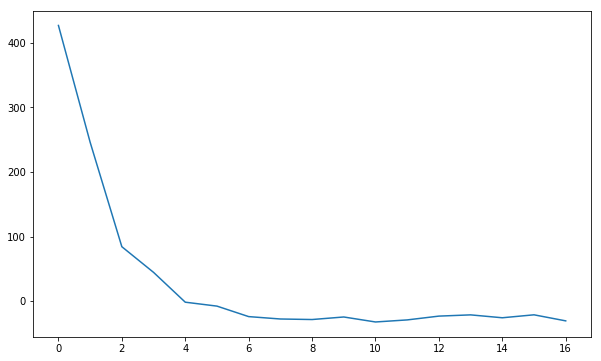

In [159]:
plt.plot(grad_bic[1:-1])

In [165]:
model=fitdata(data,25)

n is: 1
n is: 2
n is: 3
n is: 4
n is: 5
n is: 6
n is: 7
n is: 8
n is: 9
n is: 10
n is: 11
n is: 12
n is: 13


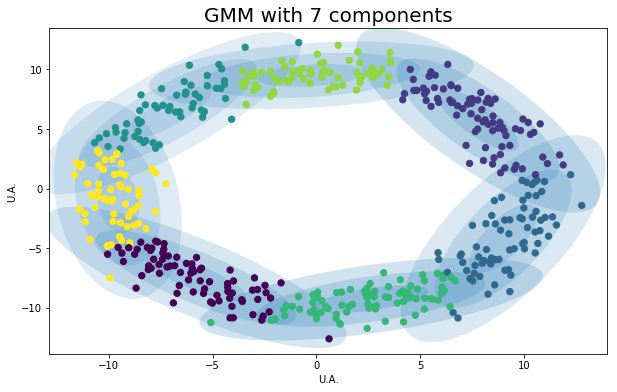

In [162]:
plot_gmm(model, data)

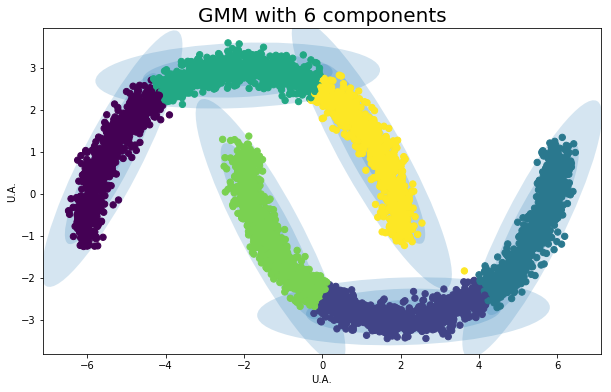

In [121]:
plot_gmm(gmm, data)

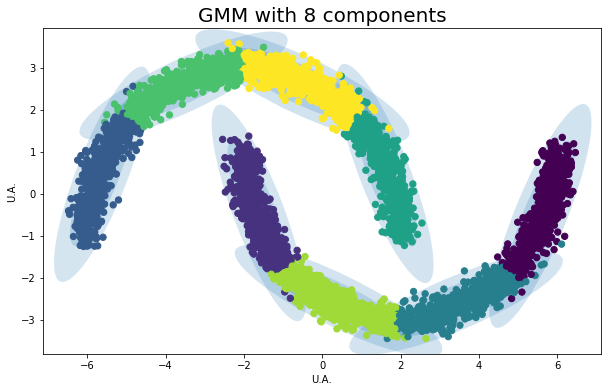

In [123]:
plot_gmm(gmm, data)